### IMDB dataset explorer

This notebook will help to explore the data set `imdb`

In [1]:
%load_ext autoreload
%autoreload 2


from sentimental_hwglu.naive_sa import NaiveSA
from sentimental_hwglu.utils import *
from sentimental_hwglu.words_statistics import WordStatistics
from sklearn.feature_extraction.text import CountVectorizer

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import time
import re


#### Prepare data - Load Data

In [2]:
project = Project('/data/zibaldone/projects/ai/zbb/data')
if not os.path.exists(project.csv_filename_extened):
    # the same as running module imdb prepare
    df = loadIMDBdataset(filename=project.csv_filename + '.csv')
    n_reviews = len(df.reviews)
    df['emoticons'] = df.reviews.apply(extract_emoticons)
    df['original'] = df.reviews
    df['reviews'] = df.reviews.apply(clear_emoticons)
    df['reviews'] = df.reviews.apply(clean_html_tags)
    n_bins = int(np.sqrt(n_reviews))
    df['length'] = df.reviews.apply(lambda x : len(x))
    df['words'] = df.reviews.apply(lambda x : len(x.split()))
    df['sentences'] = df.reviews.apply(lambda x : len([w for w in re.split('\.|!|\?|:', x) if len(w.strip()) > 0 and len(w.split()) > 3]))
    df['positive_emoticons'] = df.reviews.apply(lambda x : len(re.findall('positive_emoticon', x)))
    df['negative_emoticons'] = df.reviews.apply(lambda x : len(re.findall('negative_emoticon', x)))
    pandas2csv(df, project.get_filename(project.csv_filename, tag='extended'))
else:
    df = loadIMDBdataset(project.csv_filename_extened)

In [6]:
# TODO: clean repetition of ! ? ...

#### plots text dimensions

In [8]:
from sentimental_hwglu.plotter import StatisticWordsParameters, plot_statistics_words

dimension:  length  mode:  658
dimension:  length  mean:  1285.28316


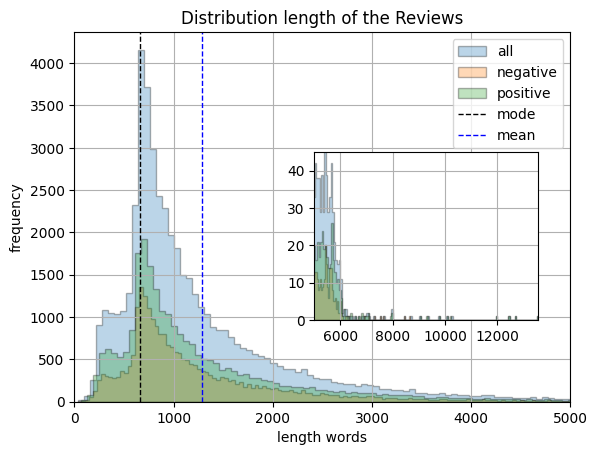

In [9]:
params = StatisticWordsParameters()
params.set_xlim([0, 5000])
params.set_xlabel('length words')
params.set_ylabel('frequency')
params.set_title("Distribution length of the Reviews")
params.set_tail(True)
params.set_density(False)
params.set_tail_ylim([0, 0.00005] if params.density else [0, 45])
params.set_position_tail([0.5, 0.28, 0.35, 0.35])
params.set_hist_type('stepfilled')
params.set_mode(True)
params.set_mean(True)
plot_statistics_words(params, df, 'length')

dimension:  words  mode:  123
dimension:  words  mean:  227.1121


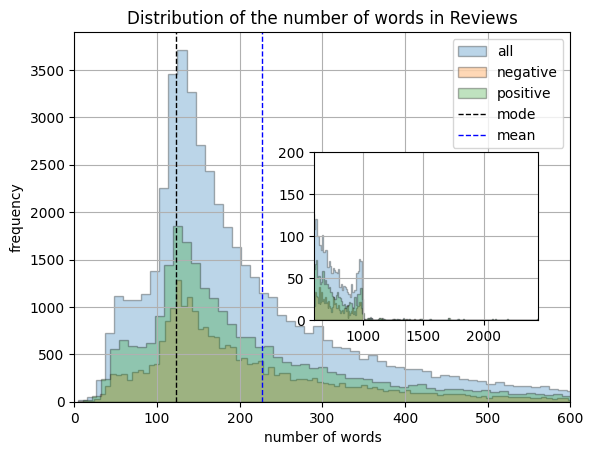

In [10]:
params.set_xlim([0, 600])
params.set_xlabel('number of words')
params.set_ylabel('frequency')
params.set_title("Distribution of the number of words in Reviews")
params.set_tail(True)
params.set_density(False)
params.set_tail_ylim([0, 0.00005] if params.density else [0, 200])
# params.set_position_tail([0.5, 0.35, 0.35, 0.35])
params.set_hist_type('stepfilled')
plot_statistics_words(params, df, 'words')

dimension:  sentences  mode:  8
dimension:  sentences  mean:  12.48824


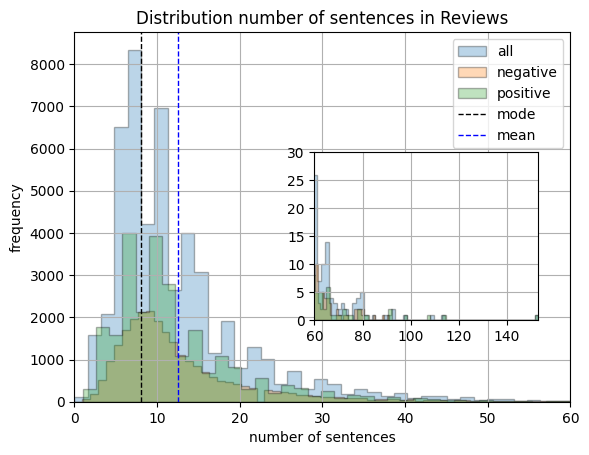

In [11]:
params.set_xlim([0, 60])
params.set_xlabel('number of sentences')
params.set_ylabel('frequency')
params.set_title("Distribution number of sentences in Reviews")
params.set_tail(True)
params.set_density(False)
params.set_bins(95)
params.set_tail_ylim([0, 0.00005] if params.density else [0, 30])
# params.set_position_tail([0.5, 0.35, 0.35, 0.35])
params.set_hist_type('stepfilled')
plot_statistics_words(params, df, 'sentences')


In [12]:
n_bins = int(np.sqrt(n_reviews))

In [13]:
# df['words_length'] = df.reviews.apply(lambda x : np.array([len(y) for y in x.split()]))

In [14]:
def __():
    words = np.array([])
    numpy_array = df.words_length.to_numpy()
    tot = len(numpy_array)
    tmp = np.array([])
    for n, array in enumerate(numpy_array):
        if n % 100 == 0: 
            perc = 100.0 * n / tot
            completed = int(perc * 20 / 100)
            remaining = 20 - completed
            print(" reading array [{}{}] {:.1f}%".format('#' * completed, ' ' * remaining, perc), end='\r')
            words = np.append(words, tmp)
            tmp = np.array([])
        tmp = np.append(tmp, array)
    words = np.append(words, tmp)
    words.shape
    wf = pd.DataFrame({'words_length': words})
    wf.words_length.hist(bins=120)

#### Emoticons

In [4]:
print("NEGATIVE Emoji: ", df[(df.emoticons.notnull()) & (df.negative_emoticons > 0)]['emoticons'].unique())
print("POSITIVE Emoji: ", df[(df.emoticons.notnull()) & (df.positive_emoticons > 0)]['emoticons'].unique())
print("----------------------------------------------------------")
print(df[(df.emoticons.notnull())]['emoticons'].unique())
print(len(df[(df.emoticons.notnull())]['emoticons']))
s = df[(df.emoticons.notnull())].reviews.iloc[0]
print(s)
em = extract_emoticons(s)
i = s.find('negative_emoticon_')
print(i, s[i-10: i+15])
i = s.find('positive_emoticon_')
print(i, s[i-25: i+25])

NEGATIVE Emoji:  [' :-( ' ' :( ' ' :/ ' ' :o ' ' :S ' ' DX ' " :'( "]
POSITIVE Emoji:  [' :-P ' ' XD ' ' :) ' ' ;) ' ' ;-) ' ' D: ' ' :D ' ' =) ' ' =D ' ' :-) '
 ' 8) ' ' :)  :P ' ' xp ' ' XP ' ' :)  ;) ' ' =] ' ' :o) ' ' :-D ' ' :P '
 ' :} ' ' ;)  ;D  XD ' ' :)  :D  :p ' ' :-)  ;-) ' ' <3 ' ' d: '
 ' :)  ;-) ' ' ;D ']
----------------------------------------------------------
[' :-P ' ' XD ' ' :) ' ' ;) ' ' :-( ' ' ;-) ' ' D: ' ' :D ' ' =) ' ' =D '
 ' :( ' ' :-) ' ' 8) ' ' :)  :P ' ' xp ' ' :/ ' ' XP ' ' :)  ;) ' ' =] '
 ' :o) ' ' :-D ' ' :P ' ' :} ' ' :o ' ' ;)  ;D  XD ' ' :)  :D  :p '
 ' :-)  ;-) ' ' :S ' ' <3 ' ' d: ' ' DX ' " :'( " ' :)  ;-) ' ' ;D ']
271
"spaced invaders" is one of the funniest movies, i´ve ever seen. i don´t understand, why this movie didn´t get better critics, it´s funny, harmless and sweet. i first watched it, when i was 11, and i really fell in love with it... 2 days later, i got it on vhs positive_emoticon_42 till today, i´ve shown it to many friends, and th

In [5]:
# df[df.emoticons.notnull() & df.sentiment == 0]
print(df[df.negative_emoticons == 3]['reviews'].values)
print(df[df.negative_emoticons == 3]['original'].values)


['wwe was in need of a saviour as wrestlemania 14 rolled around. the departure of bret hart and subsequent evaporation of the hart foundation had left the vile d-generation x stable unchallenged in the wwe. their despicable leader shawn michaels had stolen the title from hart thanks to the interference of vince mcmahon and, with help from his cohorts triple h and chyna had systematically taken out anyone who challenged his supremacy. but at the royal rumble a new contender had emerged. stone cold steve austin. hated by mcmahonagement, austin had negative_emoticon_19 worried. so worried in fact that they\'d enlisted the help of "the baddest man on the planet" mike tyson as a special enforcer. austin would have the odds firmly against him in his title match with shawn michaels.but first, there was an undercard to get through which kicked off with the legion of doom winning a forgettable 15 team battle royal to become no.1 contenders for the tag titles. i\'d actually forgotten this match 

In [6]:
print("NEGATIVE reviews with NEGATIVE emoticons", len(df[(df.negative_emoticons) & (df.sentiment == 0)]))
print("NEGATIVE reviews with POSITIVE emoticons", len(df[(df.positive_emoticons) & (df.sentiment == 0)]))
print("POSITIVE reviews with NEGATIVE emoticons", len(df[(df.negative_emoticons) & (df.sentiment == 1)]))
print("POSITIVE reviews with POSITIVE emoticons", len(df[(df.positive_emoticons) & (df.sentiment == 1)]))

NEGATIVE reviews with NEGATIVE emoticons 19
NEGATIVE reviews with POSITIVE emoticons 88
POSITIVE reviews with NEGATIVE emoticons 8
POSITIVE reviews with POSITIVE emoticons 134


<AxesSubplot:>

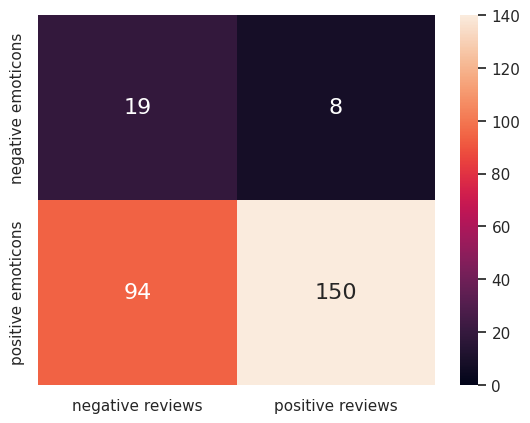

In [7]:
import seaborn as sn
array = [
    [
        len(df[(df.negative_emoticons > 0) & (df.sentiment == 0)]), 
        len(df[(df.negative_emoticons > 0) & (df.sentiment == 1)]), 
        ],
    [
        len(df[(df.positive_emoticons > 0) & (df.sentiment == 0)]),
        len(df[(df.positive_emoticons > 0) & (df.sentiment == 1)]),
        ]
]
df_cm = pd.DataFrame(array, ['negative emoticons', 'positive emoticons'], ['negative reviews', 'positive reviews'])
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, fmt="d", annot_kws={"size": 16}, vmin=0, vmax=140) # font size

In [8]:
print(df[(df.positive_emoticons) & (df.sentiment == 0)].original.iloc[0])
print(df[(df.positive_emoticons) & (df.sentiment == 0)].reviews.iloc[0])

I give 3 stars only for the beautiful pictures of Africa. The rest was... well pretty boring. For about 50min we have the outline of the plot... In War of the worlds, the introductory part lasted, oh, about 10min? Then was real action! This is something like:"Let's take a walk in the savanna and gasp at the beautiful sunsets!". And maybe deliver a message, like "Don't kill elephants!". Very ecological. I would have expected this out of a "new" Steven Segal movie, not from this... The leading actress makes me think about artificial sun-tan, dyed hair and too much foundation! And I didn't see one scene where her hair is messed up, or she sweats, or her clothes are dusty. She just doesn't look like a 19 century woman! And in the bar, where they seek up our hero, Swayze makes a comment about the commander that he looks like Dracula. Hmmm, Bram Stoker wrote his book and published it in 1896, and it became famous in the next years. Livingstone and other explorers went to central Africa from 

In [9]:
print("POSITIVE reviews with        NEGATIVE *AND* POSITIVE emoticons: ", len(df[(df.positive_emoticons > 0) & (df.negative_emoticons > 0) & (df.sentiment == 1)]))
print("NEGATIVE reviews with        NEGATIVE *AND* POSITIVE emoticons: ", len(df[(df.positive_emoticons > 0) & (df.negative_emoticons > 0) & (df.sentiment == 0)]))

print("POSITIVE reviews with                *ONLY* POSITIVE emoticons: ", len(df[(df.positive_emoticons > 0) & (df.negative_emoticons == 0) & (df.sentiment == 1)]))
print("POSITIVE reviews with *ONLY* NEGATIVE                emoticons: ", len(df[(df.positive_emoticons == 0) & (df.negative_emoticons > 0) & (df.sentiment == 1)]))

print("NEGATIVE reviews with                *ONLY* POSITIVE emoticons: ", len(df[(df.positive_emoticons > 0) & (df.negative_emoticons == 0) & (df.sentiment == 0)]))
print("NEGATIVE reviews with *ONLY* NEGATIVE                emoticons: ", len(df[(df.positive_emoticons == 0) & (df.negative_emoticons > 0) & (df.sentiment == 0)]))

POSITIVE reviews with        NEGATIVE *AND* POSITIVE emoticons:  0
NEGATIVE reviews with        NEGATIVE *AND* POSITIVE emoticons:  0
POSITIVE reviews with                *ONLY* POSITIVE emoticons:  150
POSITIVE reviews with *ONLY* NEGATIVE                emoticons:  8
NEGATIVE reviews with                *ONLY* POSITIVE emoticons:  94
NEGATIVE reviews with *ONLY* NEGATIVE                emoticons:  19


In [10]:
df[(df.positive_emoticons == 0) & (df.negative_emoticons > 0) & (df.sentiment == 1)].iloc[1].original

"I contend that whoever is ultimately responsible for creating/approving the trailer for this movie has completely blundered. NO ONE I know wanted to see this movie based on the previews, and EVERYONE who actually saw it (that I know) absolutely loved it... The advertising campaign is disgrace/disaster/blunder.<br /><br />Opened at #4 behind...<br /><br />#1-Rush Hour, which I have not seen, average IMDb score of 7.4.<br /><br />#2-The Bourn Ultimatum, which I have seen, awesome movie but 3rd week out, average IMDb score of 8.7 (deserving I would say).<br /><br />#3-The Simpsons Movie, which I have seen, okay movie but 4th week out, average IMDb score of 8.1 (a bit high in my opinion).<br /><br />#4-Stardust, average IMDb score of 8.4 (lower then Bourn, but that's been our for 3 weeks).<br /><br />Whether it was poor scheduling or poor advertising I think that the powers that be behind this movie screwed up big time! This should have been advertised as an amazing movie that happens to 

In [36]:
s = df[(df.negative_emoticons > 0) & (df.emoticons.str.find('D:') >= 0)].reviews.iloc[0]
i = s.find('negative_e')
print(s[max(0, i-25): i + 25])

the 60s (1999) negative_emoticon_17 mark


In [12]:
print("reviews with emoticons: ", len(df[df.emoticons.notnull()]))

reviews with emoticons:  271


In [7]:
from sentimental_hwglu.utils import Emoticons
print(Emoticons.positive.index(' D: '))

69


In [11]:
# df['emoticons'] = df[('emoticons', 'negative_emoticons', 'positive_emoticons')].apply(lambda x : x)
# df['col_3'] = df.apply(lambda x: f(x.col_1, x.col_2), axis=1)
def ___():
    df['positive_emoticons', 'negative_emoticons', 'review'] = df.apply(
        lambda x: (
            x.positive_emoticons +1, 
            x.negative_emoticons - 1, 
            x.reviews.replace('negative_emoticon_17', 'positive_emoticons_69')) 
            if ( x.negative_emoticons > 0) and (x.emoticons.find('negative_emoticons_17') >= 0)
            else (x.positive_emoticons, x.negative_emoticons, x.reviews), axis=1
        )

In [13]:
# df[(df.negative_emoticons > 0) & (df.emoticons.str.find('D:') >= 0)].emoticons
len(df[(df.emoticons.str.find(' negative_emoticon') >= 0)].emoticons)

0

In [ ]:
df[(df.reviews.str.find(' negative_emoticon_17 ') >= 0) & (df.emoticons.str.find(' D: ') >= 0)].iloc[0]

In [9]:
df[(df.positive_emoticons == 0) & (df.negative_emoticons > 0) & (df.sentiment == 1)].sort_values('length', ascending=True).iloc[0].values

array([26206,
       "does anyone know where or how i can get a copy of this film?!! i've been searching for way too long, someone help! back in 1997 my girlfriends and i were extras on this long island based film, and we actually never got to see it. negative_emoticon_1 i was hoping i could find a copy somehow so i can finally check it out, and share it with the girls! is there anyone out there who knows where to get a copy of this, so i can stop driving myself crazy? (also, it doesn't matter if its in in vhs format, i'm still in the ice age myself.) if you, or anyone you know, has a copy of this film please help, i would be willing to pay for a good copy of it!",
       1,
       "DOes anyone know where or how i can get a copy of this film?!! I've been searching for way too long, someone help! Back in 1997 my girlfriends and i were extras on this Long Island based film, and we actually never got to see it. :( <br /><br />i was hoping i could find a copy somehow so i can finally check